## TP2.1 : Stratégies d'investissement 

*Notebook fait par Alexandre Boistard, Ethan Trentin.*

Nous allons dans un premier temps télécharger les données en sélectionnant dix titres financiers de secteurs différents (dont un du secteur minier et un du secteur bancaire). 
Nous prenons les actifs suivants : 
- Secteur Technologique : AAPL (Apple Inc.)
- Secteur Énergétique : XOM (Exxon Mobil Corporation)
- Secteur de la Santé : JNJ (Johnson & Johnson)
- Secteur Industriel : CAT (Caterpillar Inc.)
- Secteur des Biens de Consommation : PG (Procter & Gamble Co.)
- Secteur des Télécommunications : VZ (Verizon Communications Inc.)
- Secteur Minier : BHP (BHP Group Limited)
- Secteur Bancaire : JPM (JPMorgan Chase & Co.)
- Secteur Immobilier : SPG (Simon Property Group, Inc.)
- Secteur des Matériaux : FCX (Freeport-McMoRan Inc.)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# On créé un dataframe poiur stocker les données
df = pd.DataFrame()
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
for ticker in tickers:
    df[ticker] = yf.download(ticker, start="2006-01-01", end="2020-01-01")["Close"]
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX
Date,,,,,,,,,,
2006-01-03,2.249496,30.437790,35.278309,35.372662,34.234390,10.366927,15.561296,24.241713,33.139282,18.278095
2006-01-04,2.256117,30.489840,35.822117,36.272274,34.298473,10.670631,15.912537,24.101803,33.223782,19.336330
2006-01-05,2.238362,30.338882,35.673294,36.272274,34.187817,10.793475,15.587972,24.174810,33.591370,18.705269
2006-01-06,2.296142,30.937527,35.833553,36.994415,34.152847,10.836681,15.894751,24.345133,34.043499,19.106552
2006-01-09,2.288617,30.921894,36.056808,37.667606,34.409145,10.881617,16.152624,24.740541,34.318150,18.960932
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,68.823013,54.453617,126.020622,131.665833,110.010025,45.698833,39.975220,118.455109,109.546898,12.250643
2019-12-26,70.188499,54.539150,125.934265,132.326523,110.010025,45.706295,40.232132,119.712181,110.185669,12.420396
2019-12-27,70.161865,54.352516,125.865173,132.380081,110.774345,45.885273,40.320217,119.798325,110.914612,12.288364


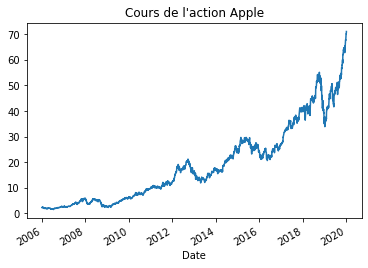

In [5]:
df["AAPL"].plot()
plt.title("Cours de l'action Apple")
plt.show()

In [3]:
# On calcule les log-rendements pour chacun des stocks
for ticker in tickers:
    df[ticker + " Log Returns"] = np.log(df[ticker]).diff()
df = df.dropna()
df

,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX,AAPL Log Returns,XOM Log Returns,JNJ Log Returns,CAT Log Returns,PG Log Returns,VZ Log Returns,BHP Log Returns,JPM Log Returns,SPG Log Returns,FCX Log Returns
Date,,,,,,,,,,,,,,,,,,,,
2006-01-04,2.256117,30.489840,35.822117,36.272274,34.298473,10.670631,15.912537,24.101803,33.223782,19.336330,0.002939,0.001709,0.015297,0.025114,0.001870,0.028875,0.022320,-0.005788,0.002547,0.056282
2006-01-05,2.238362,30.338882,35.673294,36.272274,34.187817,10.793475,15.587972,24.174810,33.591370,18.705269,-0.007901,-0.004963,-0.004163,0.000000,-0.003232,0.011447,-0.020608,0.003025,0.011003,-0.033180
2006-01-06,2.296142,30.937527,35.833553,36.994415,34.152847,10.836681,15.894751,24.345133,34.043499,19.106552,0.025486,0.019540,0.004482,0.019713,-0.001023,0.003995,0.019489,0.007021,0.013370,0.021226
2006-01-09,2.288617,30.921894,36.056808,37.667606,34.409145,10.881617,16.152624,24.740541,34.318150,18.960932,-0.003282,-0.000505,0.006211,0.018034,0.007476,0.004138,0.016094,0.016111,0.008035,-0.007651
2006-01-10,2.433368,31.161362,36.119774,37.514610,34.275162,10.926558,15.921433,24.777035,34.681522,19.721441,0.061329,0.007714,0.001745,-0.004070,-0.003901,0.004121,-0.014416,0.001474,0.010533,0.039326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,68.823013,54.453617,126.020622,131.665833,110.010025,45.698833,39.975220,118.455109,109.546898,12.250643,0.000950,-0.003849,-0.003489,-0.006893,0.002559,-0.001956,-0.001101,0.002766,0.005503,0.010836
2019-12-26,70.188499,54.539150,125.934265,132.326523,110.010025,45.706295,40.232132,119.712181,110.185669,12.420396,0.019646,0.001570,-0.000685,0.005005,0.000000,0.000163,0.006406,0.010556,0.005814,0.013762
2019-12-27,70.161865,54.352516,125.865173,132.380081,110.774345,45.885273,40.320217,119.798325,110.914612,12.288364,-0.000380,-0.003428,-0.000549,0.000405,0.006924,0.003908,0.002187,0.000719,0.006594,-0.010687


#### 1. Moyennes mobiles

*1. Nous allons d'abord implémenter une stratégie à deux paramètres, par exemple un croisement de moyennes mobiles de longueur A et B (ou EMA avec différents paramètres) sous forme de fonctions.*

In [ ]:
def ema_crossover_strategy(df, tickers, short_window, long_window):
    """Implements a simpleEMA crossover strategy.
    
    Args : 
    df : pandas.DataFrame with the adjusted close prices of all stocks and their log returns
    short_window : int, the short EMA window
    long_window : int, the long EMA window

    Returns : 
    signals : pandas.DataFrame with the signals of the strategy for each stock considered.
    """
    signals = pd.DataFrame(index=df.index)
    for stock in tickers:
        signals[stock + " Short EMA"] = df[stock].ewm(half_life=short_window).mean()
        signals[stock + " Long EMA"] = df[stock].ewm(half_life=long_window).mean()

        signals[stock + " Signal"] = 0
        signals.loc[signals[stock + " Short EMA"] > signals[stock + " Long EMA"], stock + " Signal"] = 1
        signals.loc[signals[stock + " Short EMA"] < signals[stock + " Long EMA"], stock + " Signal"] = -1
    
